In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import graph_zfactor.utils.paths
import math

### Implementacion of secant method

In [112]:
def secant_method(f, x0, x1, tol=1e-4, max_iter=700):
    """
    Implements the iterative method of secant for finding a root of a function.

    Args:
        f: the function to find the root of.
        x0, x1: the initial guesses for the root.
        tol: the tolerance for the solution.
        max_iter: the maximum number of iterations.

    Returns:
        The approximate root of the function.
    """
    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1
        x = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x - x1) < tol:
            return x
        x0, x1 = x1, x
    raise ValueError("The method failed to converge.")

In [113]:
def z_factor(ppr,tpr):
    ''' 
    Calculate the z factor of gas (z_factor), it is used the Dranchuk and Abou-Kassen
    equation of state,more especifically find the root of the equuation of state with 
    the secant method.
    
    Args:
        ppr (float): Pseudo reduced pressure (dimensionless).
        tpr (float): Pseudo reduced Temperature (dimensionless).

    Returns:
        z_factor (float): Z factor of gas (dimensionless).
     '''
    
    '''
    The firts step is read the ppr and tpr 
    '''

    ppr_z= ppr
    tpr_z= tpr

    '''
    The next step is write the equation of state, and is more easy did it by parts.
    '''
    
    def f(z):
        # Constans of the equation of state.
        A1 = 0.3265
        A2 = -1.0700
        A3 = -0.5339
        A4 = 0.01569
        A5 = -0.05165
        A6 = 0.5475
        A7 = -0.7361
        A8 = 0.1844
        A9 = 0.1056
        A10 = 0.6134
        A11 = 0.7210

        # Writting the subequations of equation of state.
        density_ro = 0.27 * (ppr_z / (z * tpr_z))
        c1_tpr = A1 + (A2 / tpr_z) + (A3 / tpr_z**3) + (A4 / tpr_z**4) + (A5 / tpr_z**5)
        c2_tpr = A6 + (A7 / tpr_z) + (A8 / tpr_z**2)
        c3_tpr = A9 * ((A7 / tpr_z) + (A8 / tpr_z**2))
        c4_tpr_ro = A10 * (1 + (A11 * density_ro**2)) * (density_ro**2 / tpr_z**3) * math.exp(-A11 * density_ro**2)

        # Writting the equation of state.
        funtion_fz = z - (1 + (c1_tpr * density_ro) + (c2_tpr * density_ro**2) - (c3_tpr * density_ro**5) + c4_tpr_ro)

        return funtion_fz
    
    # Finding the root with the method of secant, in this case I select a seeds of 0.5 and 1(case of ideal gas)

    root = secant_method(f,0.5,1)

    return root

In [114]:
z_factor(tpr=3.0,ppr=1)

0.9983141820632608

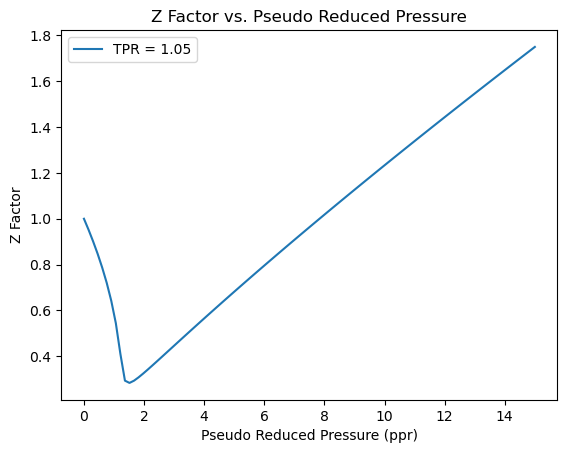

In [115]:
# Valor constante de tpr
tpr_constante = 1.05

# Crear valores de ppr en el rango de 0 a 15
ppr_values = np.linspace(0, 15, 100)

# Calcular los valores de z_factor para cada valor de ppr
z_factor_values = [z_factor(ppr, tpr_constante) for ppr in ppr_values]

# Crear la gráfica 2D
plt.plot(ppr_values, z_factor_values, label=f'TPR = {tpr_constante}')

# Etiquetas y título
plt.xlabel('Pseudo Reduced Pressure (ppr)')
plt.ylabel('Z Factor')
plt.title('Z Factor vs. Pseudo Reduced Pressure')
plt.legend()

# Mostrar la gráfica
plt.show()

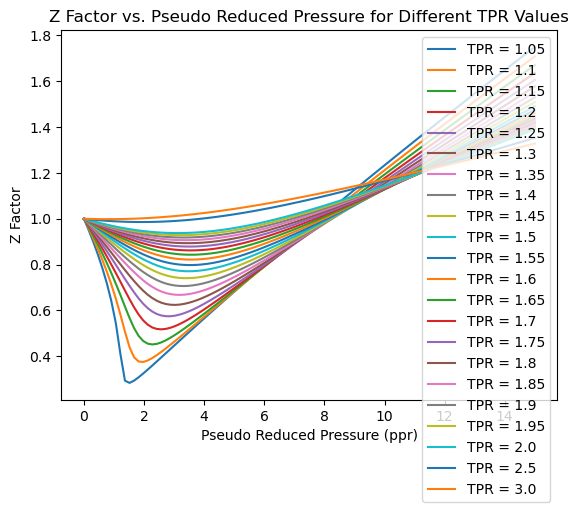

In [116]:
# Valores específicos de tpr
tpr_valores = [1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0, 2.5, 3.0]

# Rango de valores de ppr
ppr_values = np.linspace(0, 15, 100)

# Crear la gráfica 2D para cada valor de tpr
for tpr_valor in tpr_valores:
    z_factor_values = [z_factor(ppr, tpr_valor) for ppr in ppr_values]
    plt.plot(ppr_values, z_factor_values, label=f'TPR = {tpr_valor}')

# Etiquetas y título
plt.xlabel('Pseudo Reduced Pressure (ppr)')
plt.ylabel('Z Factor')
plt.title('Z Factor vs. Pseudo Reduced Pressure for Different TPR Values')
plt.legend()

# Mostrar la gráfica
plt.show()
